In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'D:\Imarticus\Class work\Self Learn projects\Intern\Money_laundering_Prevention\Adult_Censis')

In [102]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


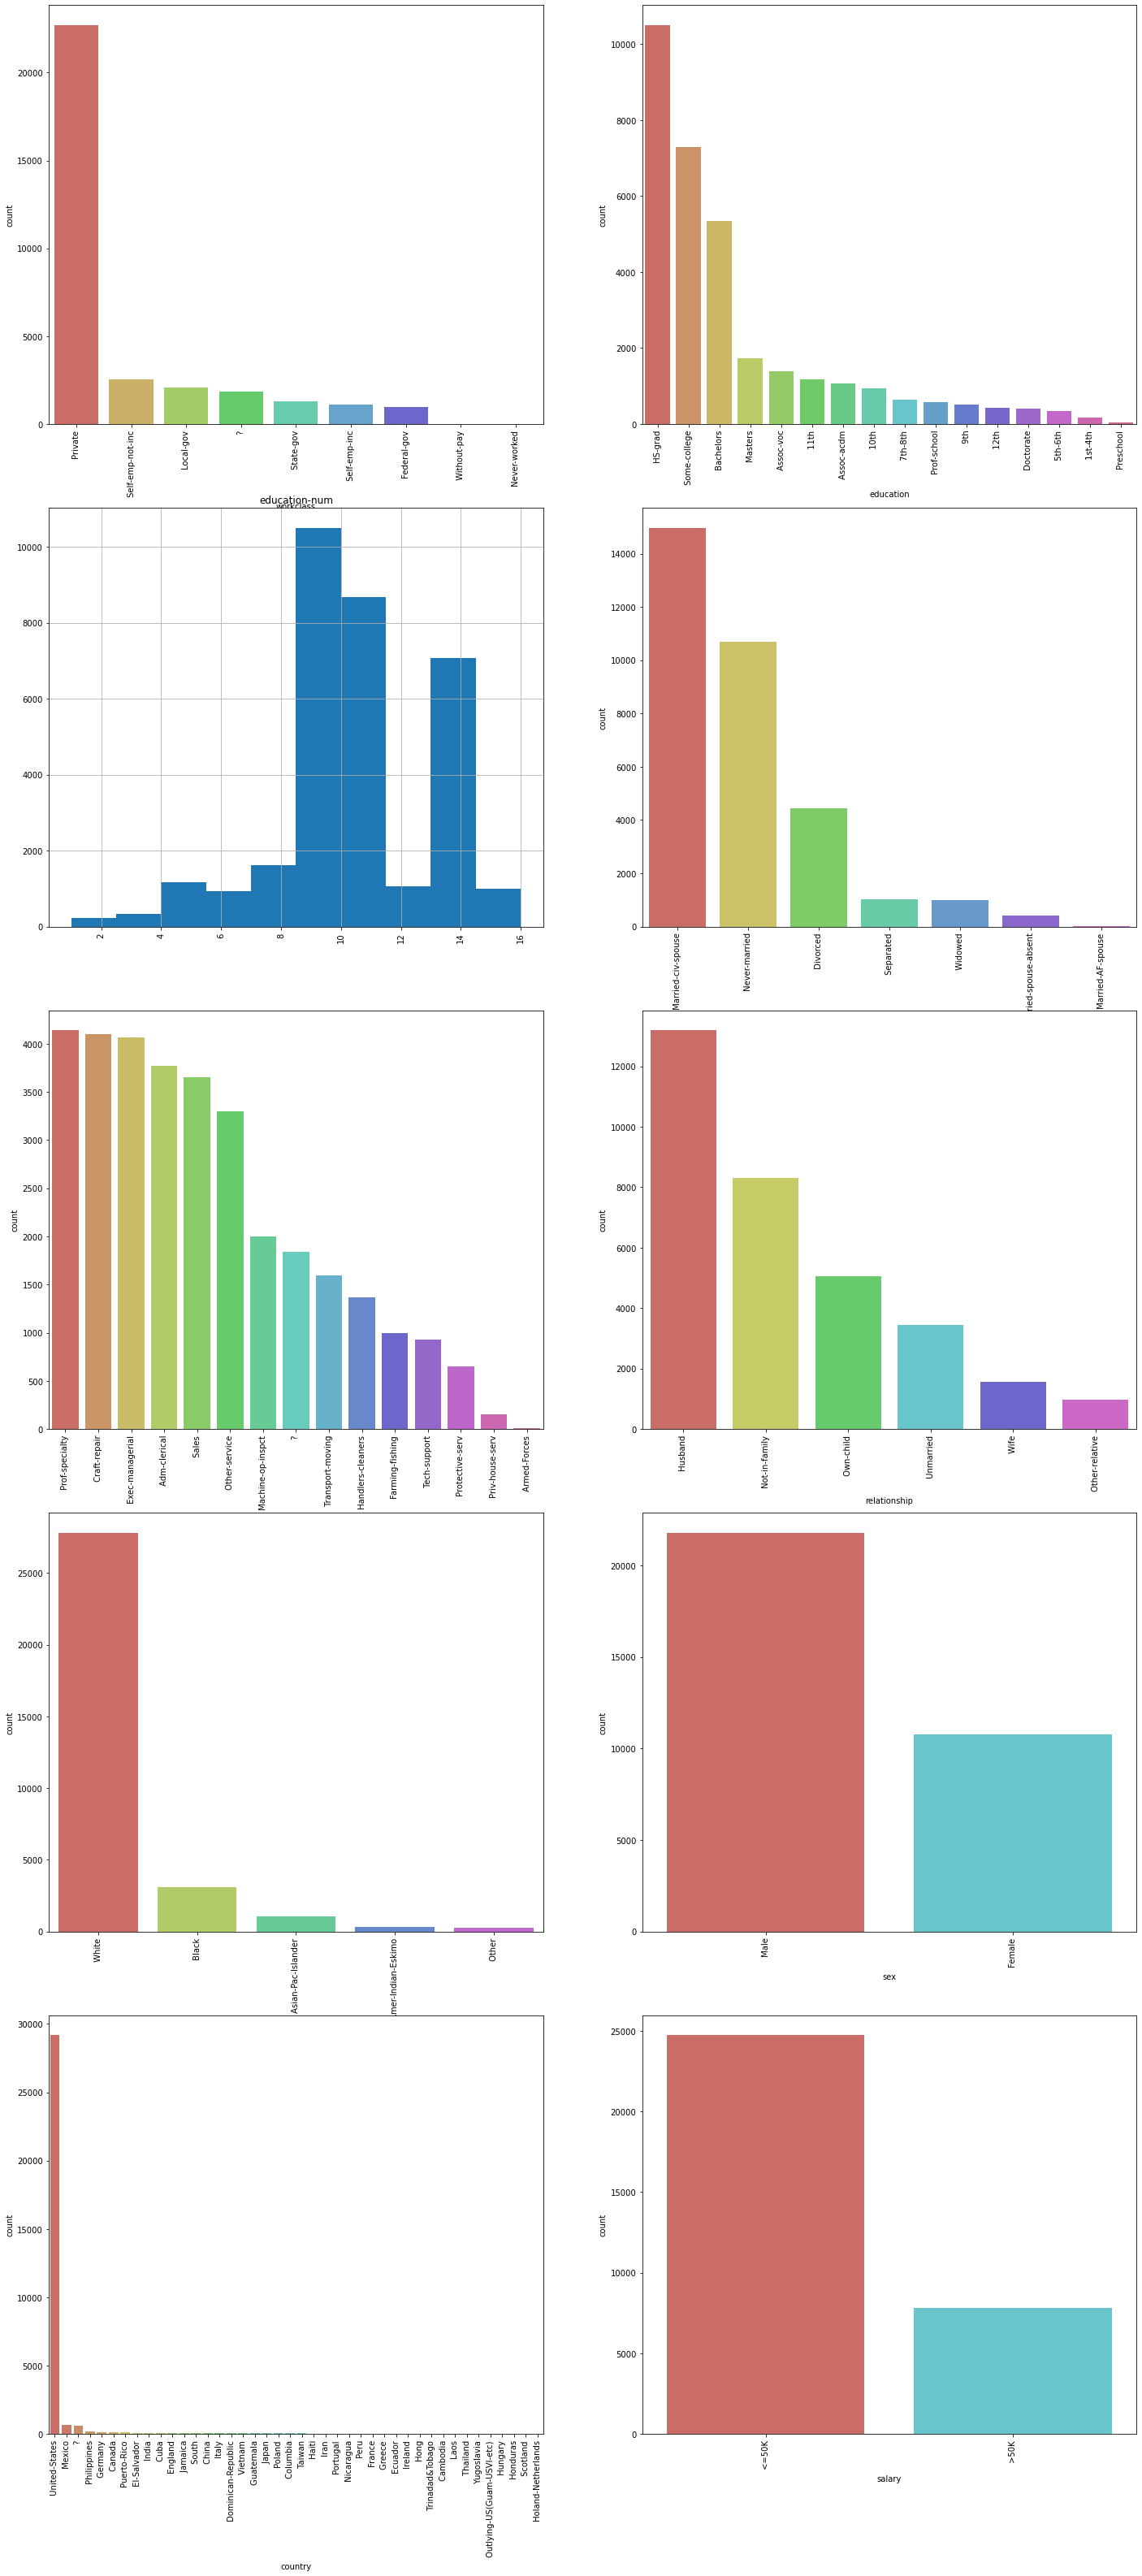

In [7]:
df = data.copy()
nuniq = df.nunique()
df = df[[col for col in df if nuniq[col]>0 and nuniq[col]<50]]
row, col = df.shape
maxgraph = 25
colname = list(df)
graphcol = 2
graphrow = (col+graphcol-1)/ graphcol
plt.figure(figsize=(12*graphcol, 10*graphrow))
for i in range(min(maxgraph,col)):
    plt.subplot(graphrow,graphcol,i+1)
    coldf = df.iloc[:,i]
    if not (np.issubdtype(type(coldf.iloc[0]),np.number)):
        sns.countplot(data=df,x=colname[i], palette='hls', order = df[colname[i]].value_counts().index)
    else:
        df[colname[i]].hist()
        plt.title(colname[i])
    plt.xticks(rotation=90)
plt.show()

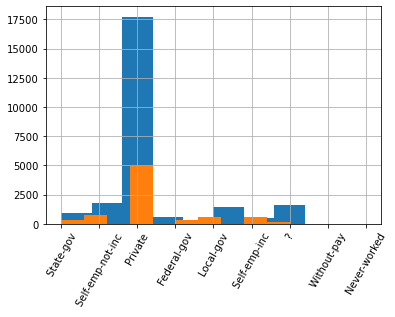

In [10]:
data.groupby('salary')['workclass'].hist()
plt.xticks(rotation=60)
plt.show()

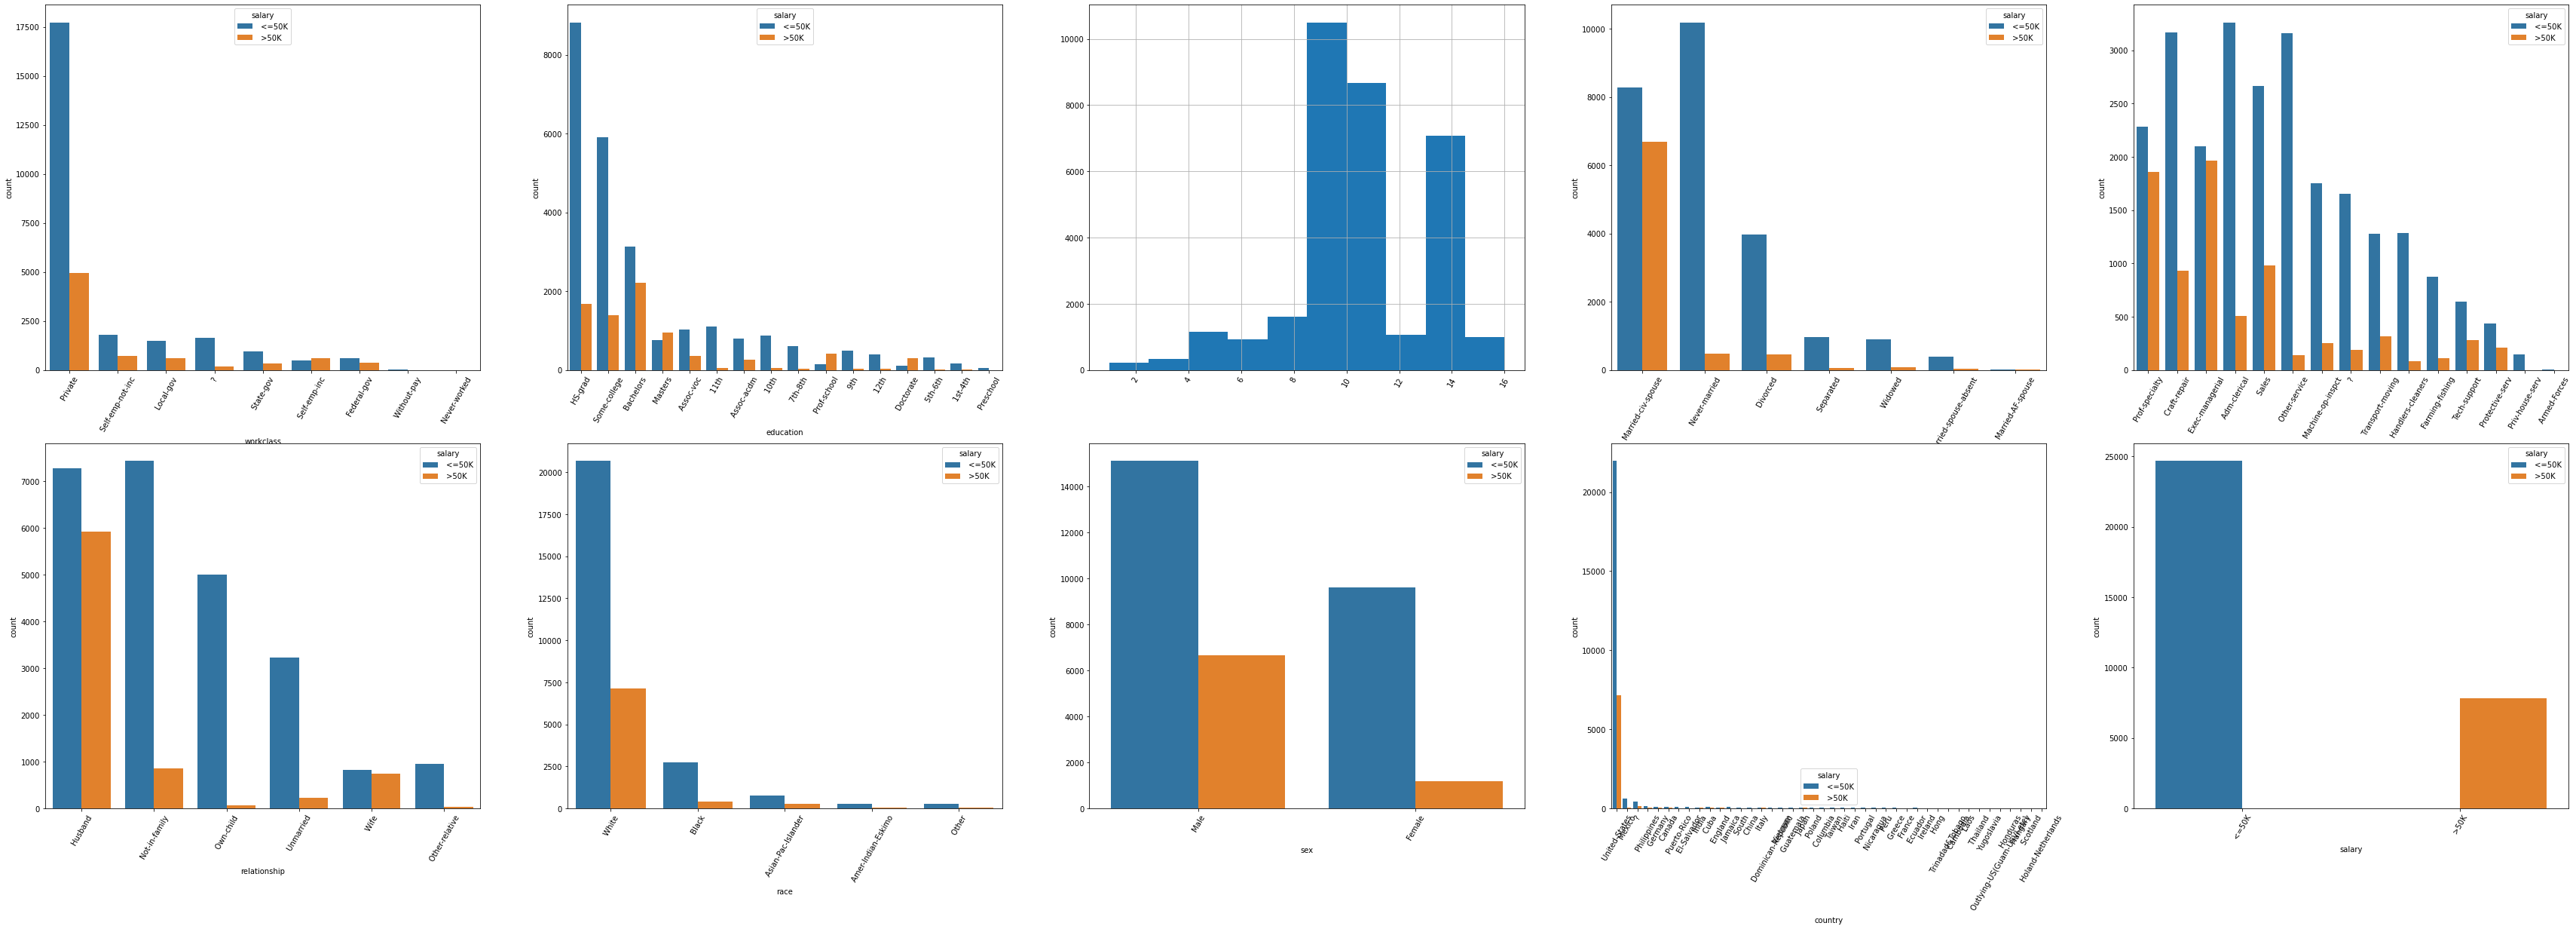

In [11]:
df = data.copy()
nuniq = df.nunique()
df = df[[col for col in df if nuniq[col]>0 and nuniq[col]<50]]
row, col = df.shape
maxgraph = 25
colname = list(df)
graphcol = 5
graphrow = (col+graphcol-1)/ graphcol
plt.figure(figsize=(12*graphcol, 7*graphrow))
for i in range(min(maxgraph,col)):
    plt.subplot(graphrow,graphcol,i+1)
    coldf = df.iloc[:,i]
    if not (np.issubdtype(type(coldf.iloc[0]),np.number)):
        sns.countplot(data=df,x=colname[i], hue= df['salary'], order = df[colname[i]].value_counts().index)
    else:
        df[colname[i]].hist()
    plt.xticks(rotation=60)
plt.show()

### Feature Engineering

In [15]:
cat_cols = data.select_dtypes(include='object').columns
for i in cat_cols:
    print(i)
    print(dict(data[i].value_counts()))

workclass
{' Private': 22696, ' Self-emp-not-inc': 2541, ' Local-gov': 2093, ' ?': 1836, ' State-gov': 1298, ' Self-emp-inc': 1116, ' Federal-gov': 960, ' Without-pay': 14, ' Never-worked': 7}
education
{' HS-grad': 10501, ' Some-college': 7291, ' Bachelors': 5355, ' Masters': 1723, ' Assoc-voc': 1382, ' 11th': 1175, ' Assoc-acdm': 1067, ' 10th': 933, ' 7th-8th': 646, ' Prof-school': 576, ' 9th': 514, ' 12th': 433, ' Doctorate': 413, ' 5th-6th': 333, ' 1st-4th': 168, ' Preschool': 51}
marital-status
{' Married-civ-spouse': 14976, ' Never-married': 10683, ' Divorced': 4443, ' Separated': 1025, ' Widowed': 993, ' Married-spouse-absent': 418, ' Married-AF-spouse': 23}
occupation
{' Prof-specialty': 4140, ' Craft-repair': 4099, ' Exec-managerial': 4066, ' Adm-clerical': 3770, ' Sales': 3650, ' Other-service': 3295, ' Machine-op-inspct': 2002, ' ?': 1843, ' Transport-moving': 1597, ' Handlers-cleaners': 1370, ' Farming-fishing': 994, ' Tech-support': 928, ' Protective-serv': 649, ' Priv-hou

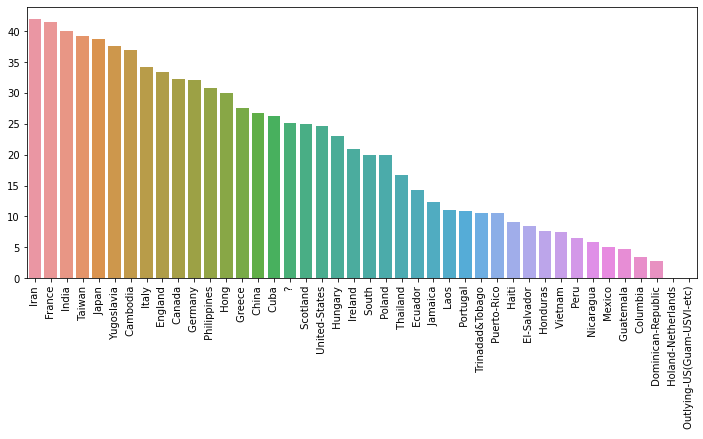

In [156]:
new = (data[(data['salary']==' >50K')]['country'].value_counts()/data['country'].value_counts())*100
new = new.sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x= new.index, y = new.values)
plt.xticks(rotation=90)
plt.show()

In [154]:
data[(data['country']==' United-States') & (data['salary']==' >50K')]['country'].value_counts()/data[(data['country']==' United-States')]['country'].value_counts()

 United-States    0.245835
Name: country, dtype: float64

In [133]:
data[(data['country']!=' United-States')]['country'].value_counts()

 Mexico                        643
 ?                             583
 Philippines                   198
 Germany                       137
 Canada                        121
 Puerto-Rico                   114
 El-Salvador                   106
 India                         100
 Cuba                           95
 England                        90
 Jamaica                        81
 South                          80
 China                          75
 Italy                          73
 Dominican-Republic             70
 Vietnam                        67
 Guatemala                      64
 Japan                          62
 Poland                         60
 Columbia                       59
 Taiwan                         51
 Haiti                          44
 Iran                           43
 Portugal                       37
 Nicaragua                      34
 Peru                           31
 France                         29
 Greece                         29
 Ecuador            

In [103]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [104]:
tmp = data['race']
tmp[(tmp.values !=' White') & (tmp.values != ' Black')]=' Other'
data['race']=tmp

In [105]:
data['race'].value_counts()

 White    27816
 Black     3124
 Other     1621
Name: race, dtype: int64

## Target Encoding

In [12]:
data[data['salary']==' >50K'].groupby('workclass')['salary'].count()

workclass
 ?                    191
 Federal-gov          371
 Local-gov            617
 Private             4963
 Self-emp-inc         622
 Self-emp-not-inc     724
 State-gov            353
Name: salary, dtype: int64

In [13]:
data.groupby('workclass')['salary'].count()

workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: salary, dtype: int64

In [14]:
dict(data[data['salary']==' >50K'].groupby('workclass')['salary'].count()/data.groupby('workclass')['salary'].count())

{' ?': 0.10403050108932461,
 ' Federal-gov': 0.38645833333333335,
 ' Local-gov': 0.29479216435738176,
 ' Never-worked': nan,
 ' Private': 0.21867289390200917,
 ' Self-emp-inc': 0.557347670250896,
 ' Self-emp-not-inc': 0.2849271940181031,
 ' State-gov': 0.27195685670261943,
 ' Without-pay': nan}

In [70]:
data[(data['country']!=' United-States') & (data['salary']==' >50K')]['country'].value_counts()

 ?                     146
 Philippines            61
 Germany                44
 India                  40
 Canada                 39
 Mexico                 33
 England                30
 Cuba                   25
 Italy                  25
 Japan                  24
 China                  20
 Taiwan                 20
 Iran                   18
 South                  16
 Poland                 12
 France                 12
 Puerto-Rico            12
 Jamaica                10
 El-Salvador             9
 Greece                  8
 Cambodia                7
 Yugoslavia              6
 Hong                    6
 Vietnam                 5
 Ireland                 5
 Portugal                4
 Ecuador                 4
 Haiti                   4
 Scotland                3
 Guatemala               3
 Hungary                 3
 Thailand                3
 Trinadad&Tobago         2
 Columbia                2
 Laos                    2
 Nicaragua               2
 Dominican-Republic      2
 

In [106]:
cols=['workclass', 'education', 'marital-status', 'occupation',
          'country','relationship']

In [107]:
df = data.copy()
for i in cols:
    print(f"colname: '{i}'")
    dit = dict(data[data['salary']==' >50K'].groupby(i)['salary'].count()/data.groupby(i)['salary'].count())
    df.replace(dit,inplace=True)
df

colname: 'workclass'
colname: 'education'
colname: 'marital-status'
colname: 'occupation'
colname: 'country'
colname: 'relationship'


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,White,Male,2174,0,40,0.245835,<=50K
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,White,Male,0,0,13,0.245835,<=50K
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,White,Male,0,0,40,0.245835,<=50K
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,Black,Male,0,0,40,0.245835,<=50K
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,Black,Female,0,0,40,0.263158,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.218673,257302,0.248360,12,0.446848,0.304957,0.475128,White,Female,0,0,38,0.245835,<=50K
32557,40,0.218673,154374,0.159509,9,0.446848,0.124875,0.448571,White,Male,0,0,40,0.245835,>50K
32558,58,0.218673,151910,0.159509,9,0.085599,0.134483,0.063262,White,Female,0,0,40,0.245835,<=50K
32559,22,0.218673,201490,0.159509,9,0.045961,0.134483,0.013220,White,Male,0,0,20,0.245835,<=50K


In [108]:
df1 = pd.get_dummies(df,drop_first=True)
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,country,race_ Other,race_ White,sex_ Male,salary_ >50K
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,2174,0,40,0.245835,0,1,1,0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0,0,13,0.245835,0,1,1,0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0,0,40,0.245835,0,1,1,0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0,0,40,0.245835,0,0,1,0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0,0,40,0.263158,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.218673,257302,0.248360,12,0.446848,0.304957,0.475128,0,0,38,0.245835,0,1,0,0
32557,40,0.218673,154374,0.159509,9,0.446848,0.124875,0.448571,0,0,40,0.245835,0,1,1,1
32558,58,0.218673,151910,0.159509,9,0.085599,0.134483,0.063262,0,0,40,0.245835,0,1,0,0
32559,22,0.218673,201490,0.159509,9,0.045961,0.134483,0.013220,0,0,20,0.245835,0,1,1,0


In [109]:
df1.fillna(0,inplace=True)
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
race_ Other       0
race_ White       0
sex_ Male         0
salary_ >50K      0
dtype: int64

In [56]:
df1.rename(columns={'salary_ >50K': 'salary'}, inplace = )
df1.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,country,race_ Other,race_ White,sex_ Male,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.240810,1.897784e+05,0.240810,10.080679,0.240810,0.240832,0.240810,1077.648844,87.303830,40.437456,0.238188,0.049783,0.854274,0.669205,0.240810
std,13.640433,0.076626,1.055500e+05,0.157708,2.572720,0.191302,0.150442,0.193945,7385.292085,402.960219,12.347429,0.045909,0.217501,0.352837,0.470506,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.045961,0.006711,0.013220,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.218673,1.178270e+05,0.159509,9.000000,0.045961,0.124875,0.063262,0.000000,0.000000,40.000000,0.245835,0.000000,1.000000,0.000000,0.000000
50%,37.000000,0.218673,1.783560e+05,0.190235,10.000000,0.104209,0.226641,0.103070,0.000000,0.000000,40.000000,0.245835,0.000000,1.000000,1.000000,0.000000
75%,48.000000,0.218673,2.370510e+05,0.261216,12.000000,0.446848,0.449034,0.448571,0.000000,0.000000,45.000000,0.245835,0.000000,1.000000,1.000000,0.000000
max,90.000000,0.557348,1.484705e+06,0.740920,16.000000,0.446848,0.484014,0.475128,99999.000000,4356.000000,99.000000,0.418605,1.000000,1.000000,1.000000,1.000000


In [22]:
data[df1['capital-gain']>8000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,27828,0,40,Philippines,>50K
32466,37,Private,121521,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,>50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K


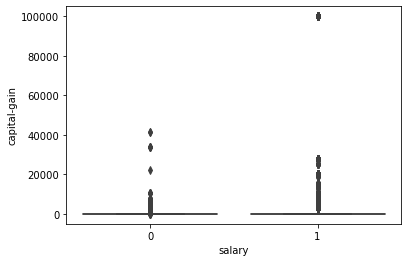

In [23]:
sns.boxplot(x=df1['salary'],y=df1['capital-gain'])
plt.show()

### Imbalance Check

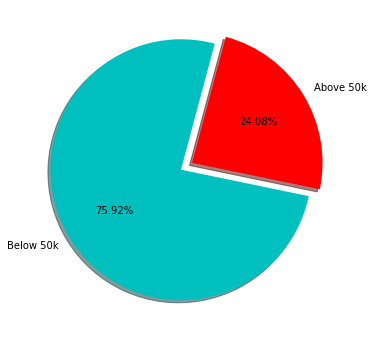

In [111]:
plt.figure(figsize=(12,6))
label=['Below 50k','Above 50k']
plt.pie(df1['salary'].value_counts(),startangle=75,shadow=True,colors='cr',labels=label,explode=(0,0.1),autopct='%.2f%%')
plt.show()

# Feature Scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [58]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,country,race_ Other,race_ White,sex_ Male,salary
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,2174,0,40,0.245835,0,1,1,0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0,0,13,0.245835,0,1,1,0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0,0,40,0.245835,0,1,1,0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0,0,40,0.245835,0,0,1,0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0,0,40,0.263158,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.218673,257302,0.248360,12,0.446848,0.304957,0.475128,0,0,38,0.245835,0,1,0,0
32557,40,0.218673,154374,0.159509,9,0.446848,0.124875,0.448571,0,0,40,0.245835,0,1,1,1
32558,58,0.218673,151910,0.159509,9,0.085599,0.134483,0.063262,0,0,40,0.245835,0,1,0,0
32559,22,0.218673,201490,0.159509,9,0.045961,0.134483,0.013220,0,0,20,0.245835,0,1,1,0


In [113]:
df2= df1.copy()
lis =['age','fnlwgt','capital-gain','capital-loss','hours-per-week','education-num']
df2[lis] = mm.fit_transform(df1[lis])
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,country,race_ Other,race_ White,sex_ Male,salary
0,0.301370,0.271957,0.044302,0.414753,0.800000,0.045961,0.134483,0.103070,0.021740,0.0,0.397959,0.245835,0,1,1,0
1,0.452055,0.284927,0.048238,0.414753,0.800000,0.446848,0.484014,0.448571,0.000000,0.0,0.122449,0.245835,0,1,1,0
2,0.287671,0.218673,0.138113,0.159509,0.533333,0.104209,0.062774,0.103070,0.000000,0.0,0.397959,0.245835,0,1,1,0
3,0.493151,0.218673,0.151068,0.051064,0.400000,0.446848,0.062774,0.448571,0.000000,0.0,0.397959,0.245835,0,0,1,0
4,0.150685,0.218673,0.221488,0.414753,0.800000,0.446848,0.449034,0.475128,0.000000,0.0,0.397959,0.263158,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.218673,0.166404,0.248360,0.733333,0.446848,0.304957,0.475128,0.000000,0.0,0.377551,0.245835,0,1,0,0
32557,0.315068,0.218673,0.096500,0.159509,0.533333,0.446848,0.124875,0.448571,0.000000,0.0,0.397959,0.245835,0,1,1,1
32558,0.561644,0.218673,0.094827,0.159509,0.533333,0.085599,0.134483,0.063262,0.000000,0.0,0.397959,0.245835,0,1,0,0
32559,0.068493,0.218673,0.128499,0.159509,0.533333,0.045961,0.134483,0.013220,0.000000,0.0,0.193878,0.245835,0,1,1,0


In [37]:
df2.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,country,salary,sex_ Male
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.240810,0.120545,0.240810,0.605379,0.240810,0.240832,0.240810,0.240810,0.010777,0.020042,0.402423,0.238188,0.240810,0.669205
std,0.186855,0.076626,0.071685,0.157708,0.171515,0.191302,0.150442,0.193945,0.043105,0.073854,0.092507,0.125994,0.045909,0.427581,0.470506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.045961,0.006711,0.013220,0.092251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.218673,0.071679,0.159509,0.533333,0.045961,0.124875,0.063262,0.255860,0.000000,0.000000,0.397959,0.245835,0.000000,0.000000
50%,0.273973,0.218673,0.112788,0.190235,0.600000,0.104209,0.226641,0.103070,0.255860,0.000000,0.000000,0.397959,0.245835,0.000000,1.000000
75%,0.424658,0.218673,0.152651,0.261216,0.733333,0.446848,0.449034,0.448571,0.255860,0.000000,0.000000,0.448980,0.245835,0.000000,1.000000
max,1.000000,0.557348,1.000000,0.740920,1.000000,0.446848,0.484014,0.475128,0.265640,1.000000,1.000000,1.000000,0.418605,1.000000,1.000000


### Multicollinearity Check

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = df2.drop('salary',1)
vif = pd.DataFrame()
vif['features']= vif_df.columns
vif['vif']= [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]
vif

,features,vif
0,age,4.057426
1,workclass,11.275260
2,fnlwgt,3.563612
3,education,17.335920
4,education-num,63.747614
5,marital-status,45.690892
6,occupation,5.196974
7,relationship,45.538474
8,capital-gain,1.064096
9,capital-loss,1.067741


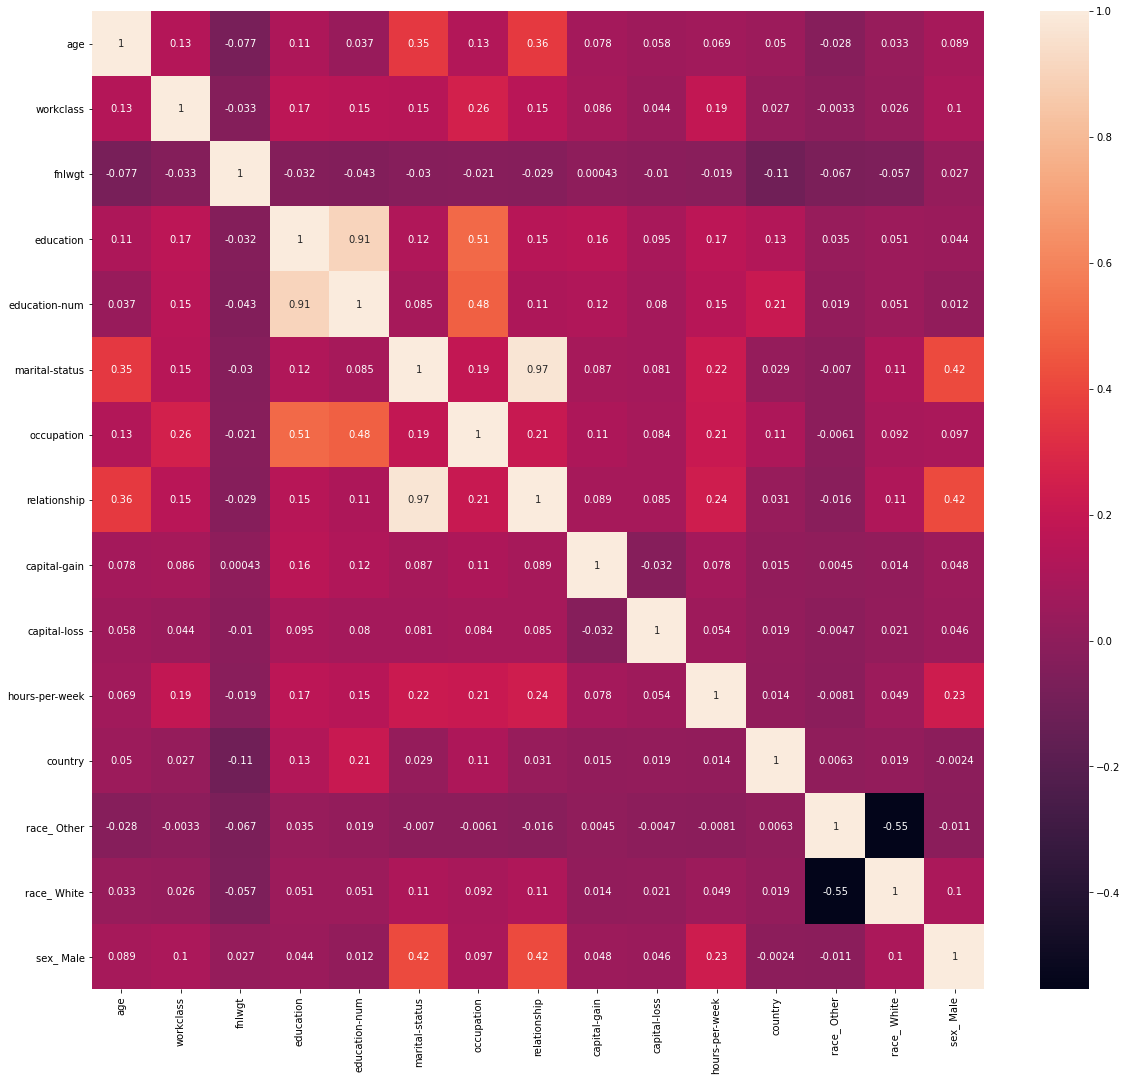

In [115]:
corr = vif_df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True)
plt.show()

In [158]:
vif_df = df2.drop(['salary','education-num','marital-status'],1)
vif = pd.DataFrame()
vif['features']= vif_df.columns
vif['vif']= [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]
vif

,features,vif
0,age,4.036264
1,workclass,10.902053
2,fnlwgt,3.463503
3,education,4.674837
4,occupation,5.193713
5,relationship,3.677744
6,capital-gain,1.058849
7,capital-loss,1.067111
8,hours-per-week,11.457389
9,country,15.734486


We can see a lot of multicollinearity in our data. So at first we try to build model using it
and see what we can.. lol lit no idea..

In [171]:
from sklearn.model_selection import train_test_split
x=df2.drop(['salary','education-num','marital-status'],1)
y=df2['salary']
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=1)

In [176]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_pred_train = log.predict(x_train)

In [178]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6303
           1       0.71      0.57      0.63      1838

    accuracy                           0.85      8141
   macro avg       0.80      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141

train_accuracy: 0.8443898443898444
test_accuracy: 0.8502640953199853


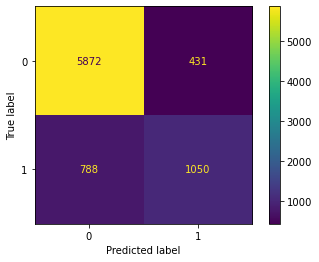

In [179]:
res(log_pred,log_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6303
           1       0.72      0.64      0.68      1838

    accuracy                           0.86      8141
   macro avg       0.81      0.78      0.79      8141
weighted avg       0.86      0.86      0.86      8141

train_accuracy: 0.9999590499590499
test_accuracy: 0.8626704336076649


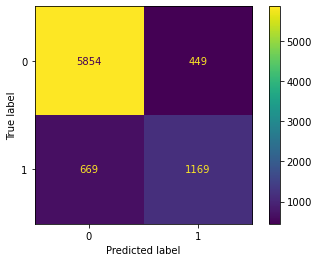

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
res(y_pred_rf,y_pred_rf_train)

From above train and test accuracy we can see that the Random forest model overfits.
Hence we use hyper parameter tunning to get the best parameters as i used below.

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6303
           1       0.82      0.50      0.62      1838

    accuracy                           0.86      8141
   macro avg       0.84      0.73      0.77      8141
weighted avg       0.86      0.86      0.85      8141

train_accuracy: 0.8548321048321048
test_accuracy: 0.8621790934774598


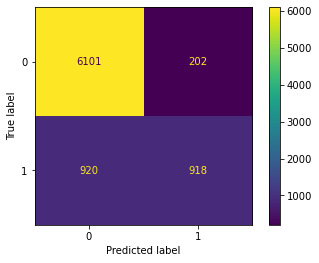

In [181]:
rf_model = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
res1(y_pred_rf,y_pred_rf_train)

In [190]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
x_train,x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.20, random_state=1)
x_train = pd.DataFrame(x_train).fillna(0)
x_test = pd.DataFrame(x_test).fillna(0)

Original dataset shape Counter({0: 24720, 1: 7841})
Resample dataset shape Counter({0: 24720, 1: 24720})


              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4959
           1       0.80      0.88      0.84      4929

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.83      9888
weighted avg       0.83      0.83      0.83      9888

train_accuracy: 0.8408171521035599
test_accuracy: 0.8300970873786407


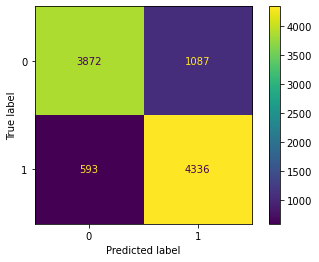

In [191]:
rf_model_smote = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1)
rf_model_smote.fit(x_train,y_train)
y_pred_rf_smote = rf_model_smote.predict(x_test)
y_pred_rf_smote_train = rf_model_smote.predict(x_train)
res(y_pred_rf_smote,y_pred_rf_smote_train)

Hence the Data has Multicollinearity, We try to use PCA to remove multicollineary and 
try to bring the accuracy with minimum features

# Using PCA

In [182]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca= pca.fit_transform(x)

In [183]:
pca.explained_variance_ratio_.cumsum()

array([0.42195078, 0.67410287, 0.76212865, 0.82163227, 0.87100009,
       0.90816308, 0.93293388, 0.95353238])

In [184]:
x_pca=pd.DataFrame(x_pca)

In [185]:
vif_df = x_pca
vif = pd.DataFrame()
vif['features']= vif_df.columns
vif['vif']= [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]
vif

,features,vif
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0


No Multicollinearity anymore...

In [186]:
x_train,x_test, y_train,y_test=train_test_split(x_pca,y,test_size=0.25, random_state=1)

In [187]:
from sklearn.linear_model import LogisticRegression
log_pca = LogisticRegression()
log_pca.fit(x_train,y_train)
log_pred_pca = log_pca.predict(x_test)
log_pred_pca_train = log_pca.predict(x_train)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6303
           1       0.68      0.53      0.59      1838

    accuracy                           0.84      8141
   macro avg       0.77      0.73      0.75      8141
weighted avg       0.83      0.84      0.83      8141

train_accuracy: 0.8288697788697789
test_accuracy: 0.8362609016091389


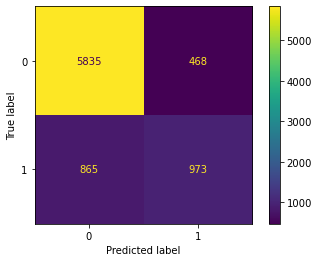

In [188]:
res(log_pred_pca,log_pred_pca_train)

In [192]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_pca, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
x_train,x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.20, random_state=1)
x_train = pd.DataFrame(x_train).fillna(0)
x_test = pd.DataFrame(x_test).fillna(0)

Original dataset shape Counter({0: 24720, 1: 7841})
Resample dataset shape Counter({0: 24720, 1: 24720})


              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4959
           1       0.78      0.86      0.82      4929

    accuracy                           0.81      9888
   macro avg       0.81      0.81      0.81      9888
weighted avg       0.81      0.81      0.81      9888

train_accuracy: 0.8158879449838188
test_accuracy: 0.8099716828478964


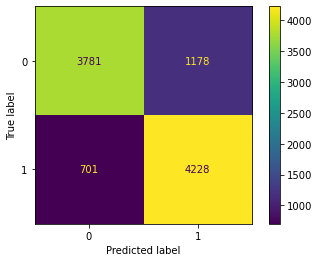

In [193]:
rf_model_smote = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1)
rf_model_smote.fit(x_train,y_train)
y_pred_rf_smote = rf_model_smote.predict(x_test)
y_pred_rf_smote_train = rf_model_smote.predict(x_train)
res(y_pred_rf_smote,y_pred_rf_smote_train)

So we can see that with only 8 columns we can get the accuracy as same as the accuracy of using all the columns